### This is the notebook for UID (Uniformity of Information Distribution) factor performance

In [30]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') # for clearness of the output

# S&P 500 companies
tickers = pd.read_csv('tickers2trade.csv')['Symbol'].tolist()
len(tickers)

504

In [31]:
# extract close data locally from datasets

import os

folder = 'data'
directories = ['data/2022', 'data/2023', 'data/2024']

open_data_dict = {}
unavailable_tickers = []

# Loop through each ticker
for ticker in tickers: 
    # Loop through each directory
    curr_data = pd.DataFrame()
    available = True
    for directory in directories:
        # Get the file path
        file_path = os.path.join(directory, f'{ticker}.csv')
        # Read the data
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            unavailable_tickers.append(ticker)
            available = False
            break  # if no current ticker in any years, ignore this ticker
        data = pd.read_csv(file_path, index_col='DateTime', parse_dates=True)
        # Filter data from 9:30 to 4 pm for all days
        data = data.between_time('09:30', '16:00')
        
        # Append the data to the curr_data DataFrame
        if curr_data.empty:
            curr_data = data['Close']
        else:
            curr_data = pd.concat([curr_data, data['Close']])
        
    if not available:
        continue
    curr_data = curr_data[~curr_data.index.duplicated(keep='first')]
    open_data_dict[ticker] = curr_data

# Combine all data into a single DataFrame
close_data = pd.concat(open_data_dict, axis=1)

File not found: data/2022\GEV.csv
File not found: data/2022\KVUE.csv
File not found: data/2022\SW.csv
File not found: data/2022\VLTO.csv
File not found: data/2022\SOLV.csv
File not found: data/2022\AMTM.csv


In [43]:
print(f"Unavailable tickers: {unavailable_tickers}")

Unavailable tickers: ['GEV', 'KVUE', 'SW', 'VLTO', 'SOLV', 'AMTM']


In [32]:
# loading prepared data
close_data = pd.read_csv('close_data.csv', index_col='DateTime', parse_dates=True)
close_data_prepared = close_data.ffill()

In [33]:
vol_daily = close_data.groupby(pd.Grouper(freq='D')).apply(lambda x: x.pct_change().std())

In [34]:
vol_daily

,AAPL,NVDA,MSFT,AMZN,META,GOOGL,TSLA,BRK.B,GOOG,AVGO,...,BF.B,DVA,FMC,MHK,BEN,WBA,QRVO,PARA,FOX,NWS
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.000656,0.001271,0.000672,0.000734,0.000672,0.000631,0.001391,0.000367,0.000589,0.000737,...,0.000672,0.000790,0.000748,0.000950,0.000757,0.000759,0.001087,0.001462,0.000861,0.000689
2022-01-04,0.000685,0.001334,0.000635,0.000743,0.000941,0.000646,0.001780,0.000487,0.000624,0.000801,...,0.000679,0.000744,0.000886,0.000856,0.000738,0.000807,0.001039,0.001408,0.000856,0.000825
2022-01-05,0.000742,0.001493,0.000792,0.000828,0.000941,0.000730,0.001754,0.000550,0.000763,0.000954,...,0.000579,0.000872,0.000685,0.001039,0.000852,0.001066,0.001143,0.001340,0.000734,0.000819
2022-01-06,0.000828,0.001881,0.000943,0.000946,0.001325,0.000974,0.002394,0.000537,0.000929,0.001046,...,0.000708,0.000871,0.000804,0.001174,0.000895,0.001937,0.001219,0.001273,0.000942,0.000847
2022-01-07,0.000728,0.001429,0.000752,0.000724,0.000859,0.000707,0.001843,0.000486,0.000708,0.000801,...,0.000575,0.000722,0.000688,0.000864,0.000769,0.001035,0.001075,0.001781,0.000830,0.000751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02,0.000410,0.000758,0.000508,0.000650,0.000703,0.000556,0.001154,0.000417,0.000526,0.000882,...,0.000851,0.000795,0.000962,0.000903,0.000750,0.001498,0.000775,0.000786,0.000500,0.000454
2024-12-03,0.000379,0.000809,0.000481,0.000635,0.000817,0.000574,0.001011,0.000501,0.000575,0.000816,...,0.000741,0.000632,0.000908,0.000722,0.000701,0.001454,0.000642,0.000822,0.000482,0.000502
2024-12-04,0.000396,0.000853,0.000551,0.000600,0.000762,0.000676,0.000863,0.000395,0.000661,0.000956,...,0.000846,0.000722,0.000931,0.001228,0.001174,0.001624,0.000760,0.000919,0.000560,0.000572


In [35]:
def get_uid_factor(close_data: pd.DataFrame) -> pd.DataFrame:
  '''
  This function returns the UID factor for given stocks.

  Parameters:
    close_data: DataFrame with stocks intraday close prices, indexed by datetime.
  Returns:
    DataFrame with weekly UID factor for given stocks, indexed by datetime.
  '''

  vol_daily = close_data.groupby(pd.Grouper(freq='D')).apply(lambda x: x.pct_change().std())

  # calculating rolling standard deviation of previous 20 days
  rolling_std_on_vols = vol_daily.rolling(window=20, min_periods=5).std()
  # Resample the data to weekly frequency and take the last value of each week
  weekly_std_on_vols = rolling_std_on_vols.resample('W').last()

  # same logic for mean values on daily vol
  rolling_mean_on_vols = vol_daily.rolling(window=20, min_periods=5).mean()
  weekly_mean_on_vols = rolling_mean_on_vols.resample('W').last()


  return weekly_std_on_vols / weekly_mean_on_vols

In [36]:
uid_factor_data_weekly = get_uid_factor(close_data_prepared)

In [37]:
uid_factor_data_weekly.head()
uid_factor_data_weekly.to_csv('uid_factor_data_weekly.csv')

# Analysis

In [38]:
import numpy as np
import alphalens as al # pip install alphalens-reloaded

experiment_data = pd.DataFrame({
  'instrument': list(uid_factor_data_weekly.columns) * len(uid_factor_data_weekly.index),
  'date': np.repeat(uid_factor_data_weekly.index, len(uid_factor_data_weekly.columns)),
  'uid': uid_factor_data_weekly.values.flatten()
})

experiment_data.set_index(['date', 'instrument'], inplace=True)

open_data_weekly = pd.read_csv('open_data_weekly.csv', index_col='DateTime', parse_dates=True)

factor_data = al.utils.get_clean_factor_and_forward_returns(experiment_data, open_data_weekly, quantiles=20, max_loss=0.4)

Dropped 6.6% entries from factor data: 6.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 40.0%, not exceeded: OK!


Information Coefficient

In [39]:
al.performance.factor_information_coefficient(factor_data, group_adjust=False, by_group=False)

,1D,5D,10D
date,,,
2022-01-09,-0.149262,-0.096397,-0.069778
2022-01-16,-0.049870,0.036162,-0.039925
2022-01-23,-0.274120,-0.096258,-0.143686
2022-01-30,0.051110,0.028231,-0.023575
2022-02-06,0.113769,-0.144140,-0.170715
...,...,...,...
2024-09-01,-0.006280,-0.024897,-0.018820
2024-09-08,-0.098996,-0.118182,-0.030090
2024-09-15,-0.168633,-0.060203,-0.011551


Returns Analysis


,1D,5D,10D
Ann. alpha,-0.532,-0.150,-0.118
beta,0.049,0.004,0.029
Mean Period Wise Return Top Quantile (bps),-72.106,-13.035,-8.370
Mean Period Wise Return Bottom Quantile (bps),22.869,3.715,0.674
Mean Period Wise Spread (bps),-94.975,-16.657,-8.964


<Figure size 640x480 with 0 Axes>

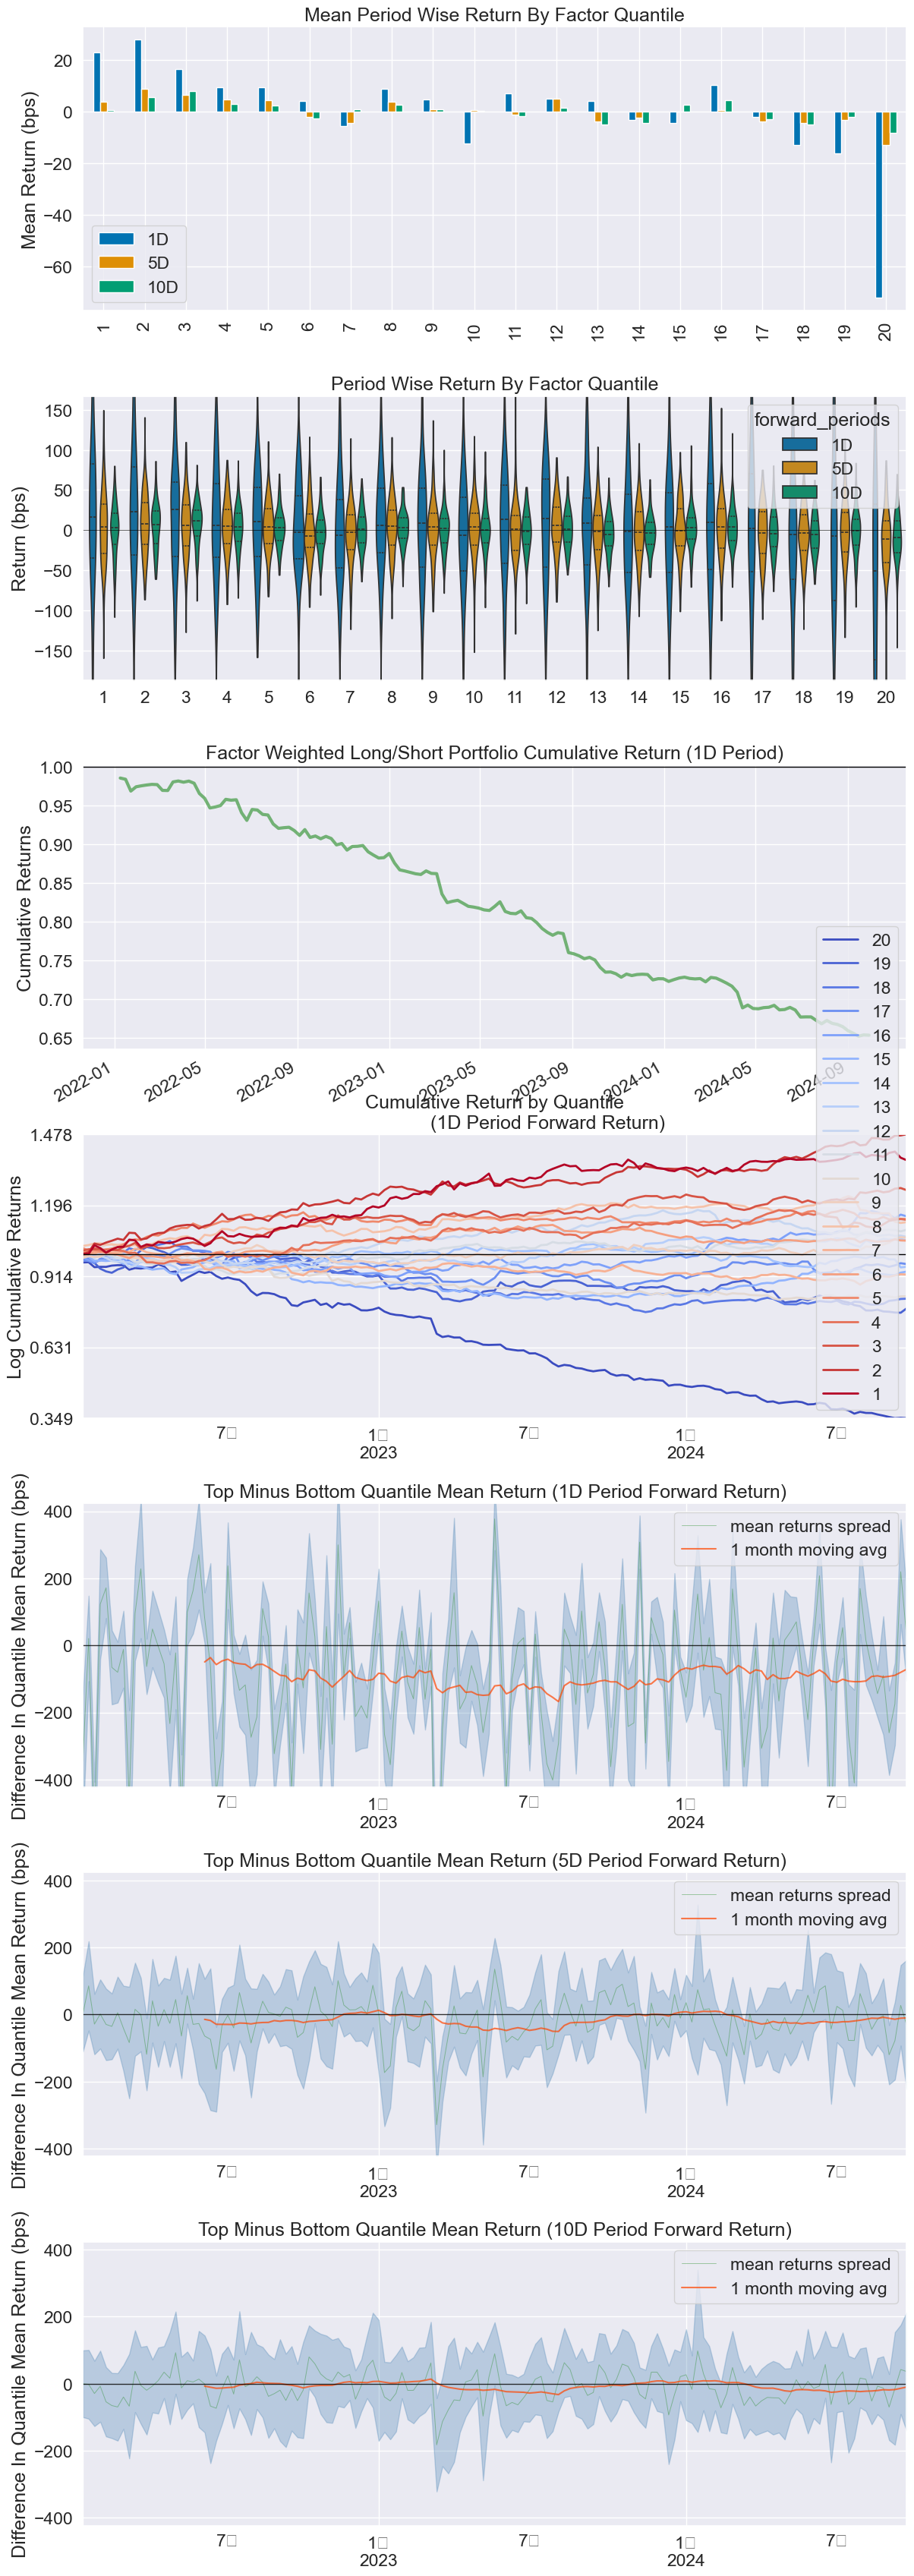

In [40]:
al.tears.create_returns_tear_sheet(factor_data)

Information Analysis


,1D,5D,10D
IC Mean,-0.033,-0.019,-0.017
IC Std.,0.106,0.080,0.073
Risk-Adjusted IC,-0.314,-0.232,-0.226
t-stat(IC),-3.751,-2.777,-2.698
p-value(IC),0.000,0.006,0.008
IC Skew,-0.190,-0.772,0.180
IC Kurtosis,1.472,1.621,-0.005


<Figure size 640x480 with 0 Axes>

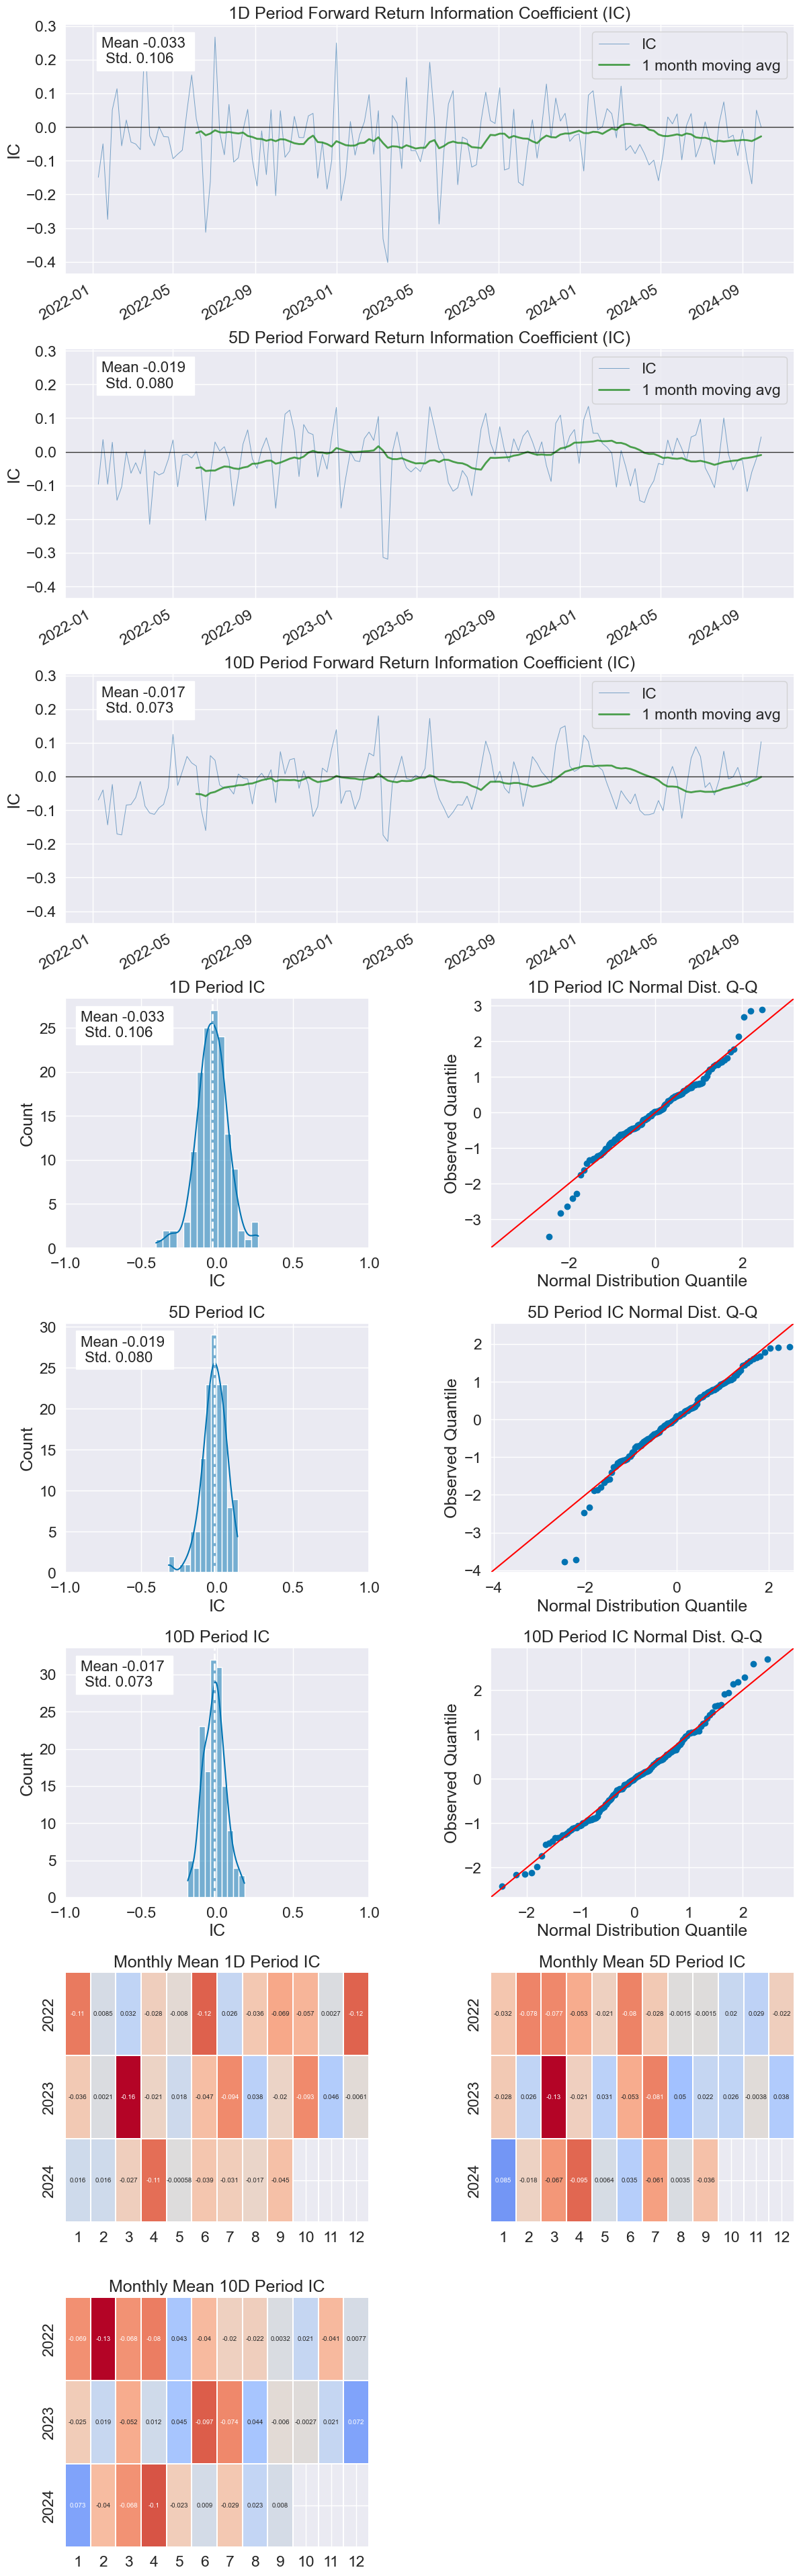

In [41]:
al.tears.create_information_tear_sheet(factor_data)

Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.710,0.926,0.925
Quantile 2 Mean Turnover,0.847,0.947,0.943
Quantile 3 Mean Turnover,0.887,0.945,0.948
Quantile 4 Mean Turnover,0.900,0.950,0.949
Quantile 5 Mean Turnover,0.914,0.951,0.948
Quantile 6 Mean Turnover,0.917,0.954,0.955
Quantile 7 Mean Turnover,0.917,0.949,0.952
Quantile 8 Mean Turnover,0.917,0.951,0.950
Quantile 9 Mean Turnover,0.921,0.952,0.951
Quantile 10 Mean Turnover,0.922,0.953,0.938


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.539,0.036,0.022


<Figure size 640x480 with 0 Axes>

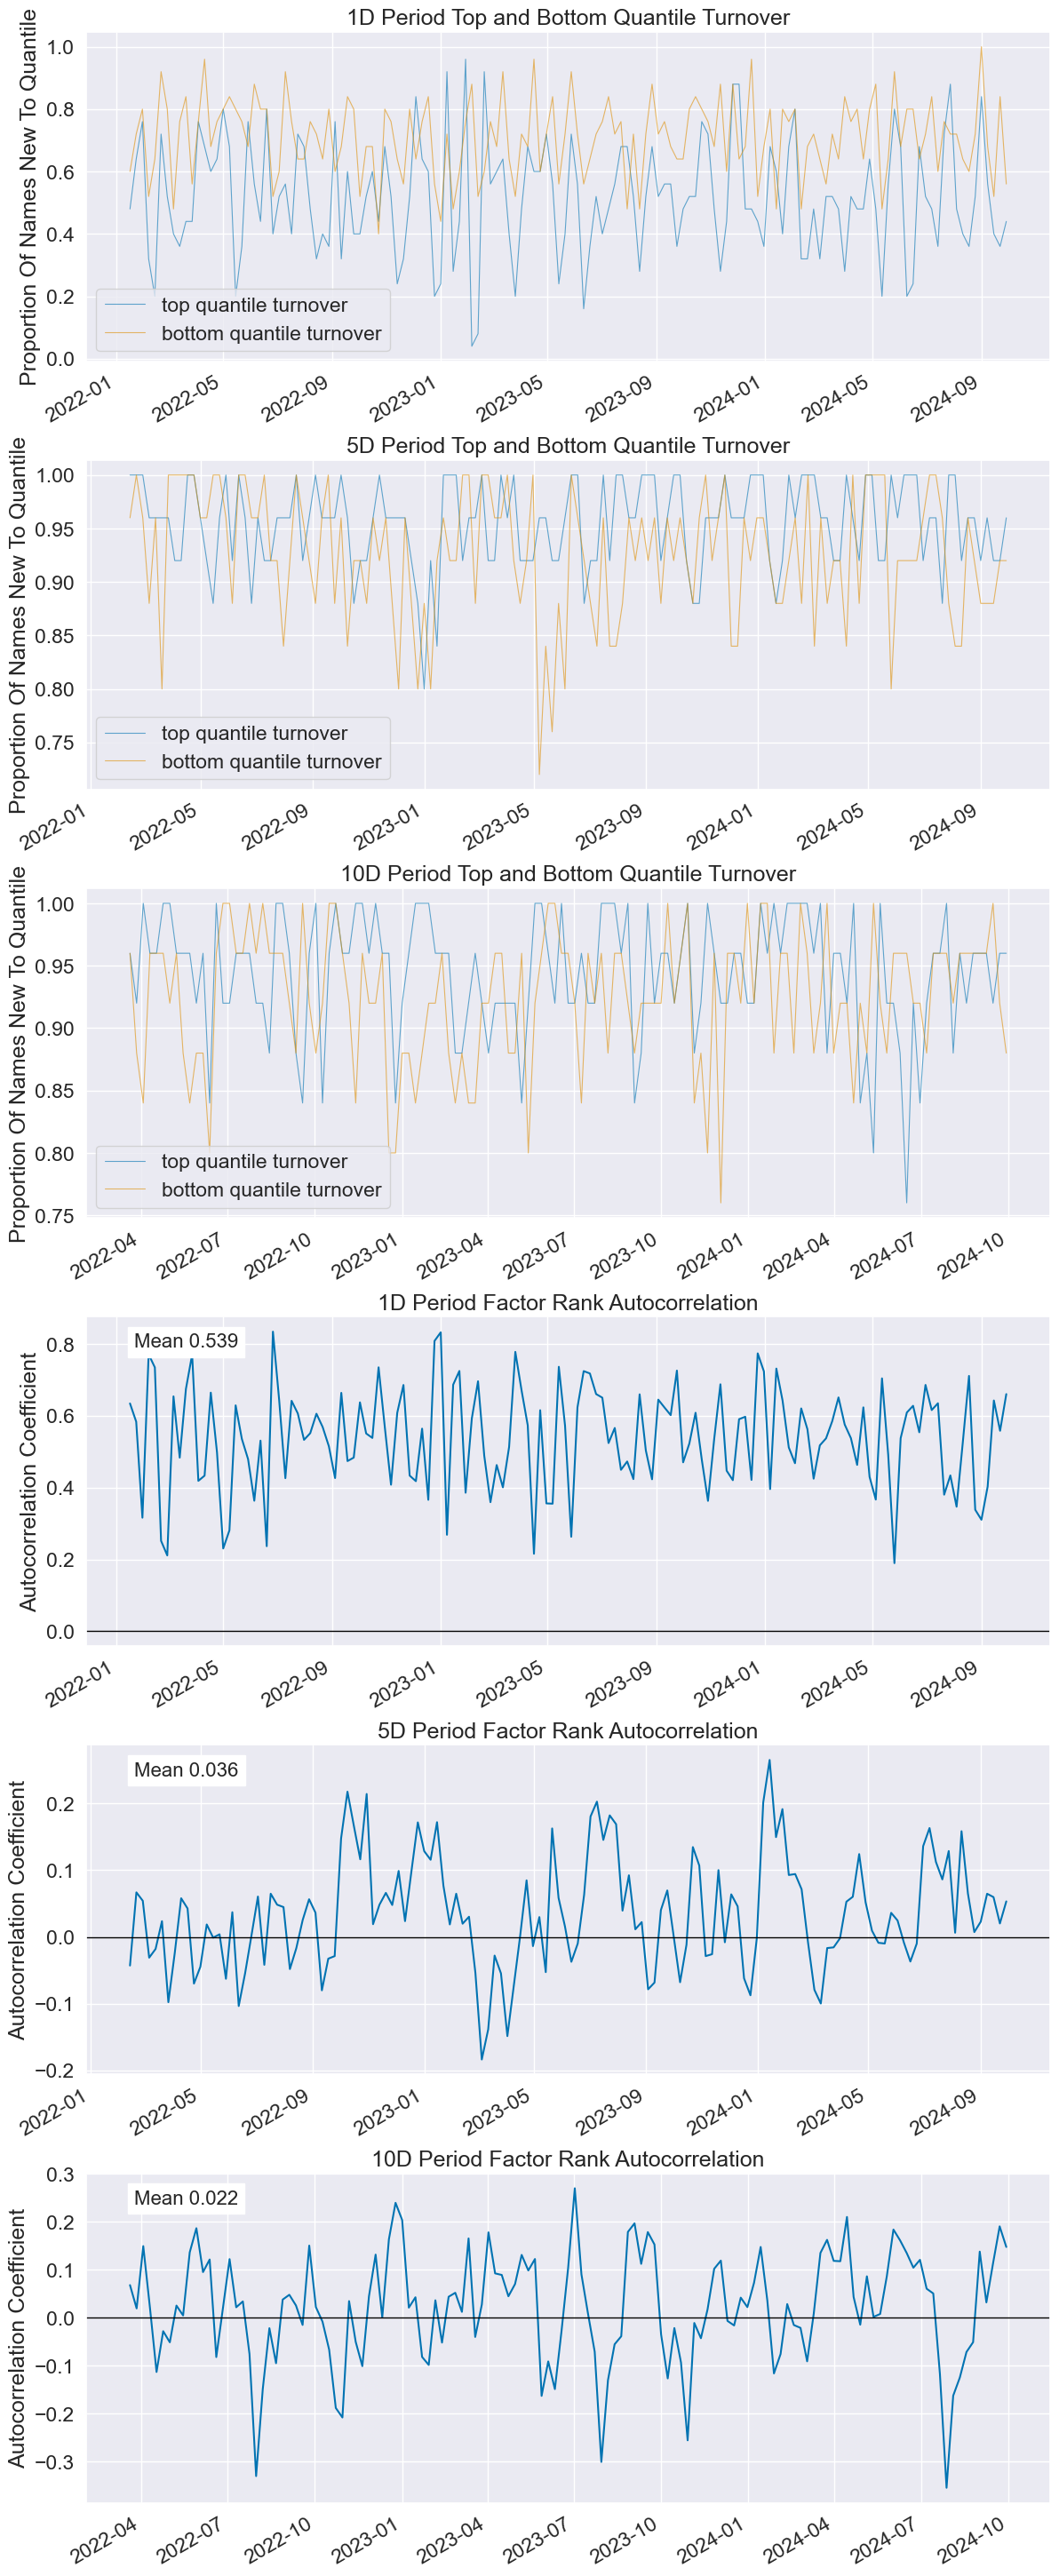

In [42]:
al.tears.create_turnover_tear_sheet(factor_data)